In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
import os
path = r"C:\Users\ADMIN\PycharmProjects\HelloPython\Practice Section\input"
print(os.listdir(path))

['USA_Housing.csv']


In [333]:
df = pd.read_csv('input/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [334]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [335]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

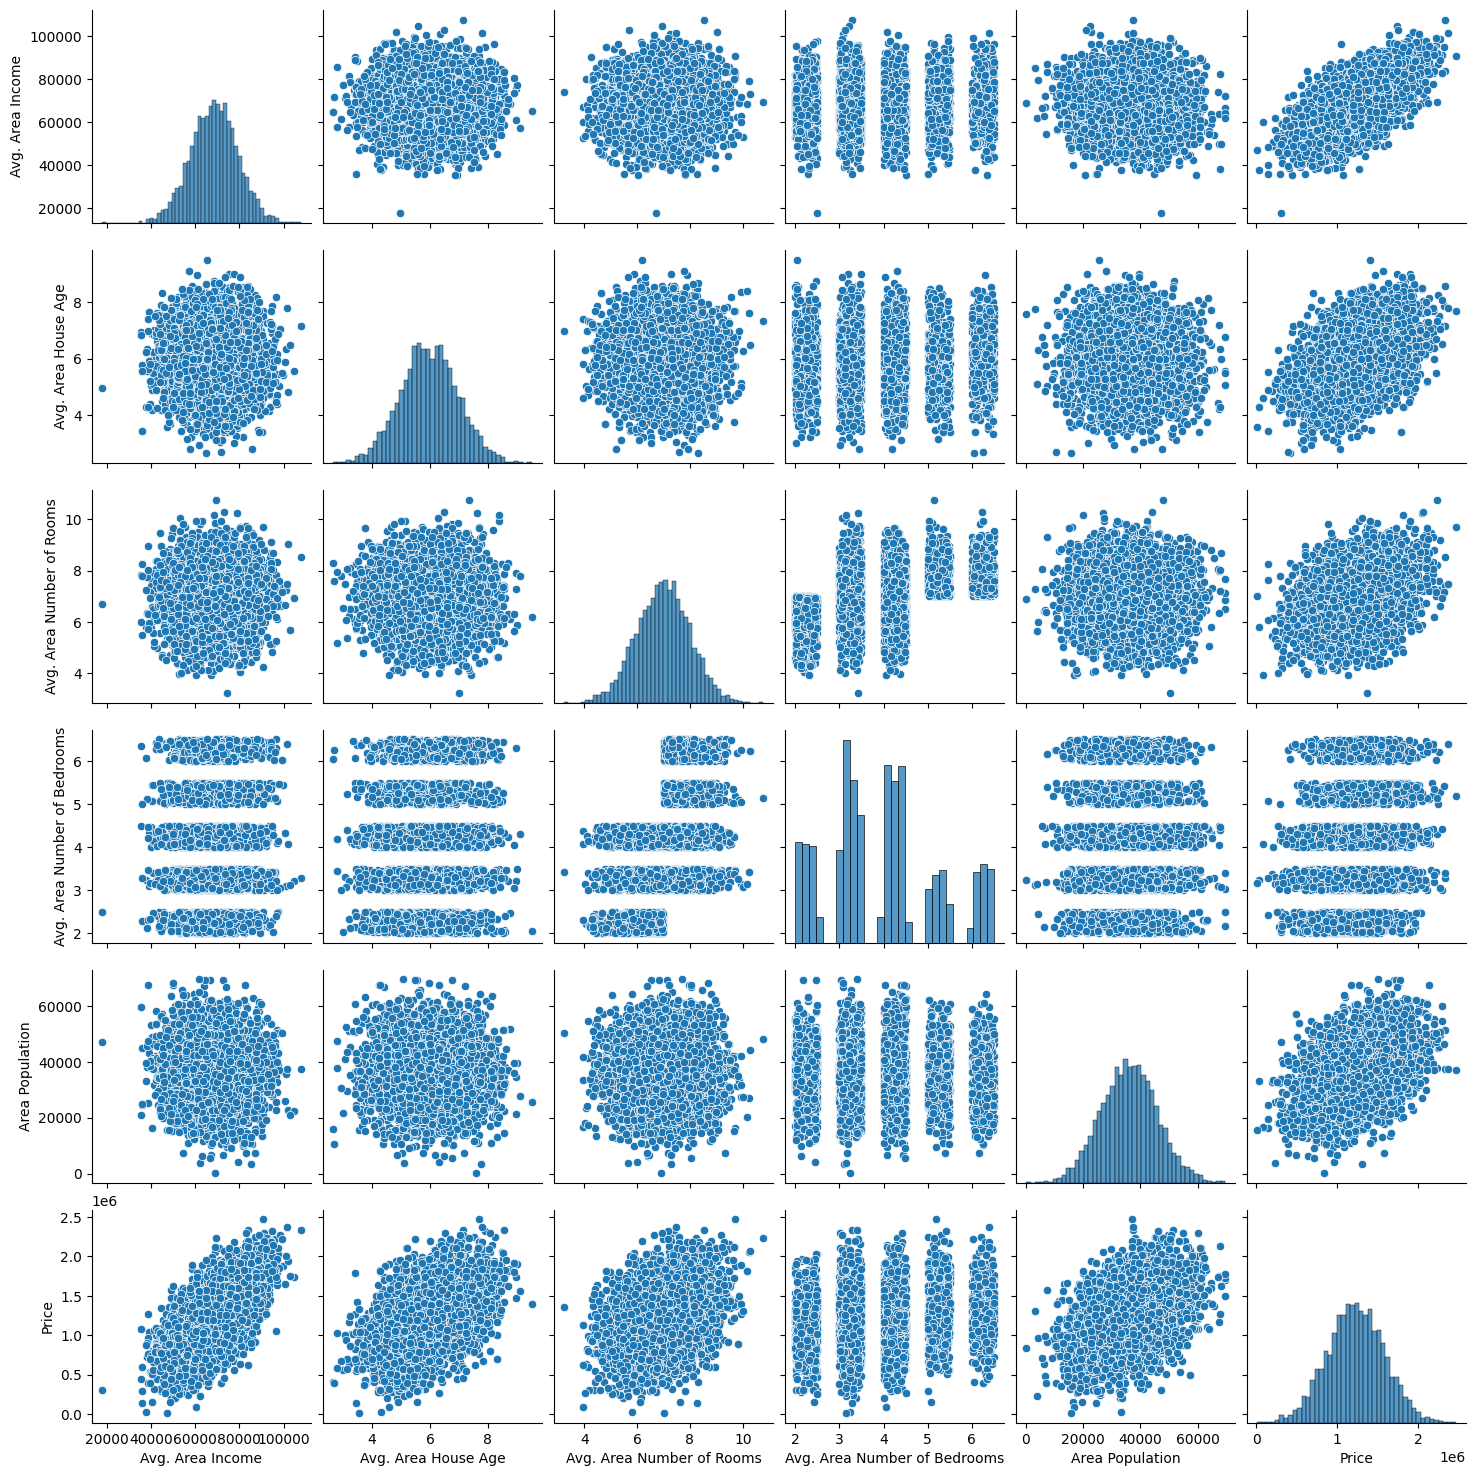

In [336]:
sns.pairplot(df)
plt.show()

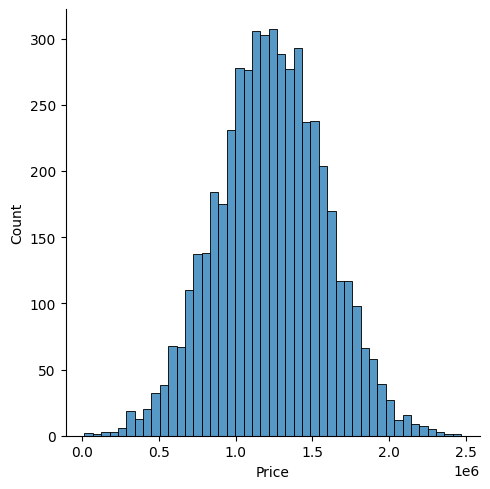

In [337]:
sns.displot(df['Price'])
plt.show()

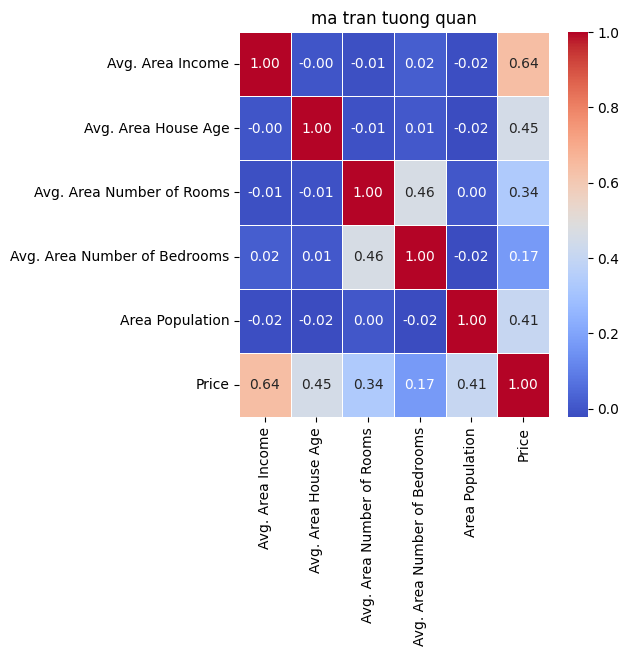

In [ ]:
#Ve ma tran correlation
df_num = df.select_dtypes(include=[np.number])

corr = df_num.corr()

plt.figure(figsize=(5,5))
sns.heatmap(
    corr,
    annot=True, #Hien thi gia tri tuong quan
    fmt =".2f", #Hien thi 2 chu so thap phan
    cmap = "coolwarm", #Bang mau chill chill
    linewidths=0.5
)
plt.title("ma tran tuong quan")
plt.show()

NORMALIZE DATA

In [ ]:
df_num.columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df_num)
print(num_cols)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09     2308

In [ ]:
from sklearn.impute import SimpleImputer #Fill mean vao nhung o N/A neu co

imputer = SimpleImputer(strategy='mean')

df_num = pd.DataFrame(
    imputer.fit_transform(df[num_cols]),
    columns=num_cols
)

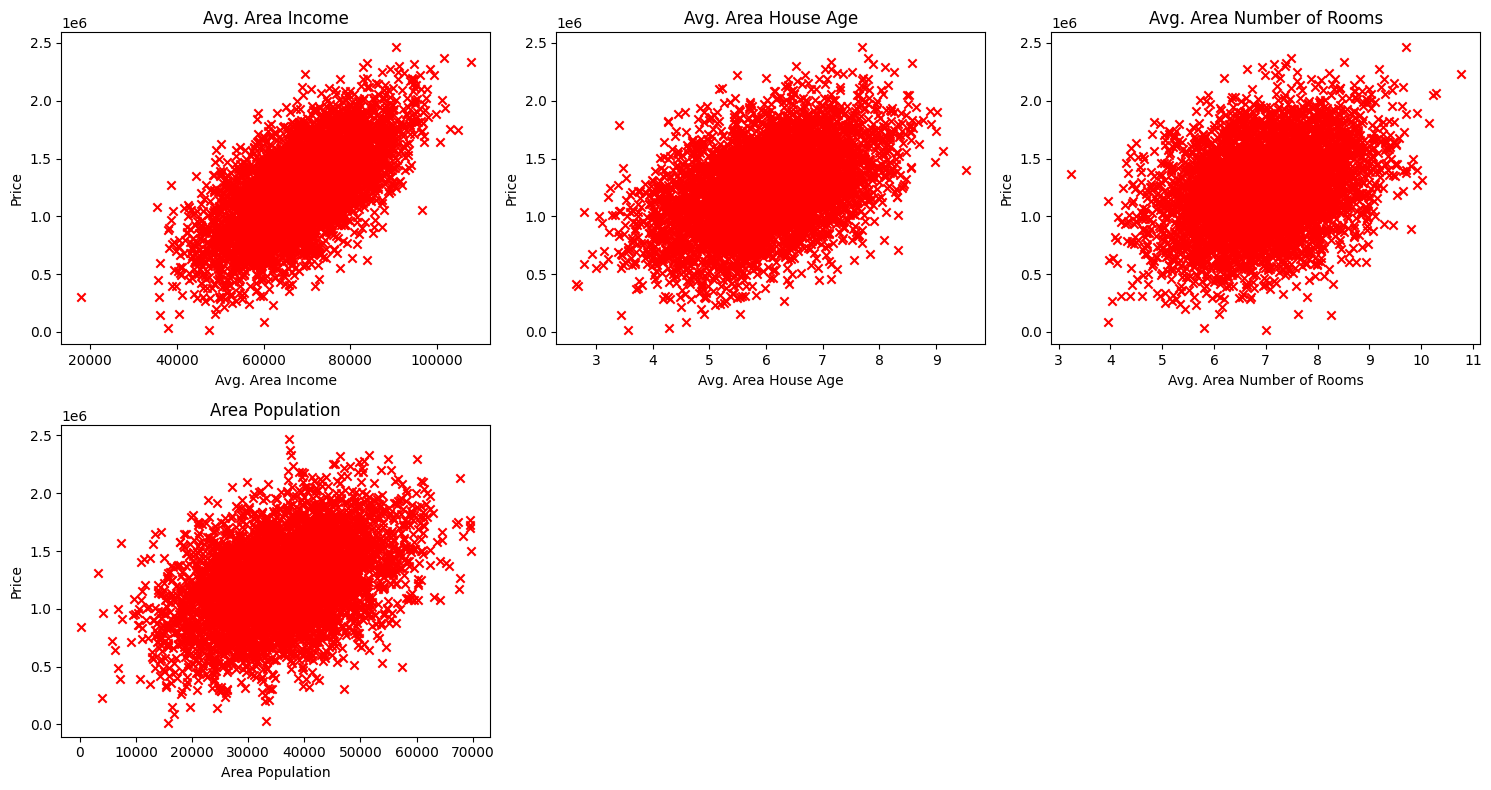

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
      'Area Population']]

y = df['Price'] #output

features = X.columns
n = len(features)
cols = 3
rows = (n + cols - 1) // cols  # lúc nào cũng đủ ô

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, features):
    ax.scatter(X[col], y, marker='x', color='r')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(col)

# với những ô chừa thừa (n < rows*cols), tắt axis
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


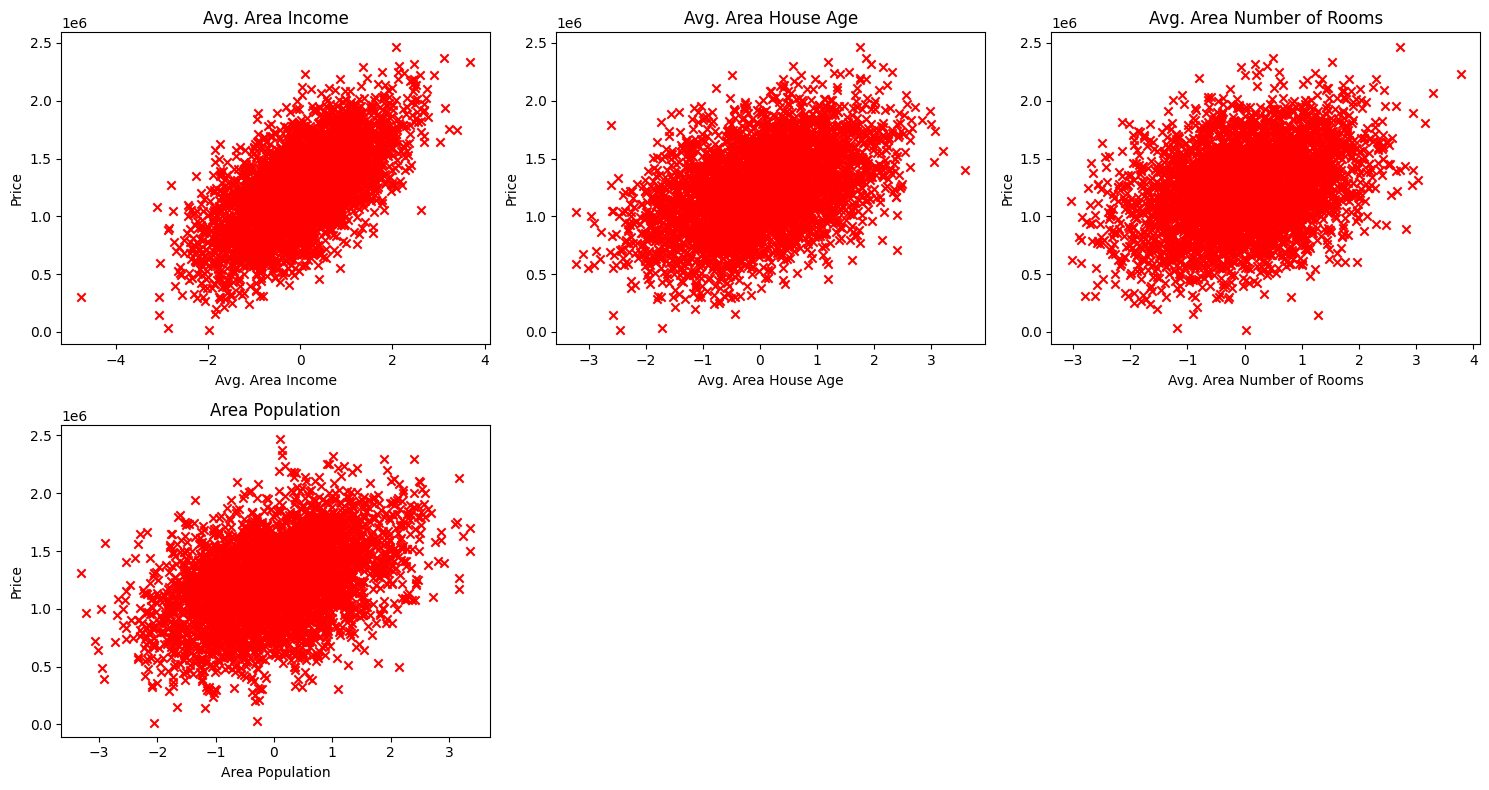

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test  = X_test .reset_index(drop=True)
y_test  = y_test .reset_index(drop=True)

scaler = StandardScaler()

#Chuan hoa x
X_train_z = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_z = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Chuẩn hóa y
scaler_y = StandardScaler()
y_train_z = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_z = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
features = X_train_z.columns

n = len(features)
cols = 3
rows = (n + cols - 1) // cols  # lúc nào cũng đủ ô

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, features):
    ax.scatter(X_train_z[col], y_train, marker='x', color='r')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(col)

# với những ô chừa thừa (n < rows*cols), tắt axis
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Tao ham cost function (Nhieu variable, va da standardize, toi chon MSE)
def cost_function(x,y,w,b):
    m = x.shape[0]
    y_pred = np.dot(x, w) + b
    cost_sum = np.sum((y_pred - y) ** 2)
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

GIAI THUAT LAP GRADIENT DESCENT

In [ ]:
#Compute gradient
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    dj_dw = (1 / m) * np.dot(x.T, error)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

In [ ]:
#Run gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    w = np.copy(w_in)
    b = b_in
    J_history = []
    w_history = []
    print_every = max(1, num_iters // 10)
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = cost_function(X, y, w, b)
        J_history.append(cost)
        if i % print_every == 0:
            w_history.append(np.copy(w))
            print(f"Iteration {i:4d}/{num_iters}: Cost {cost:.4e}")

    return w, b, J_history, w_history

Iteration    0/1500: Cost 7.2952e+01
Iteration  150/1500: Cost 4.1446e-02
Iteration  300/1500: Cost 4.1446e-02
Iteration  450/1500: Cost 4.1446e-02
Iteration  600/1500: Cost 4.1446e-02
Iteration  750/1500: Cost 4.1446e-02
Iteration  900/1500: Cost 4.1446e-02
Iteration 1050/1500: Cost 4.1446e-02
Iteration 1200/1500: Cost 4.1446e-02
Iteration 1350/1500: Cost 4.1446e-02
w, b found by gradient descent: [0.65202332 0.46340654 0.34539702 0.43291216] -5.564668489145657e-16


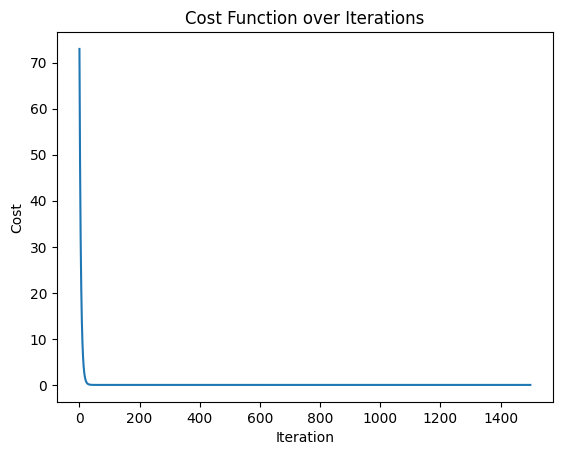


Evaluation on Test Set:
Mean Squared Error (MSE): 1.01e+10
Mean Absolute Error (MAE): 81251.35
R² Score: 0.9212

Evaluation with sklearn LinearRegression:
Mean Squared Error (MSE): 1.01e+10
Mean Absolute Error (MAE): 81251.35
R² Score: 0.9212


In [ ]:
# Chạy gradient descent
initial_w = [5,5,5,5]
initial_b = 10
iterations = 1500
alpha = 0.1
w, b, J_history, w_history = gradient_descent(
    X_train_z.to_numpy(), y_train_z, initial_w, initial_b,
    cost_function, compute_gradient, alpha, iterations
)

# In kết quả
print("w, b found by gradient descent:", w, b)
# Vẽ biểu đồ cost history
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Dự đoán trên tập test
y_pred_z = np.dot(X_test_z.to_numpy(), w) + b
y_pred = scaler_y.inverse_transform(y_pred_z.reshape(-1, 1)).flatten()

# Tính các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2e}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# So sánh với sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_z, y_train_z)
y_pred_sklearn_z = model.predict(X_test_z)
y_pred_sklearn = scaler_y.inverse_transform(y_pred_sklearn_z.reshape(-1, 1)).flatten()

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("\nEvaluation with sklearn LinearRegression:")
print(f"Mean Squared Error (MSE): {mse_sklearn:.2e}")
print(f"Mean Absolute Error (MAE): {mae_sklearn:.2f}")
print(f"R² Score: {r2_sklearn:.4f}")